
Results for linear kernel:
Best parameters found: {'svc__C': 3.845401188473625}
Training Accuracy (RandomizedSearchCV): 0.9527
Test Accuracy: 0.9556
Cross-Validation Accuracy: 0.9193

Results for rbf kernel:
Best parameters found: {'svc__C': 1.6601864044243653}
Training Accuracy (RandomizedSearchCV): 0.9861
Test Accuracy: 0.9806
Cross-Validation Accuracy: 0.9711

Results for poly kernel:
Best parameters found: {'svc__C': 7.319987722668247, 'svc__degree': 3}
Training Accuracy (RandomizedSearchCV): 0.9805
Test Accuracy: 0.9833
Cross-Validation Accuracy: 0.9499


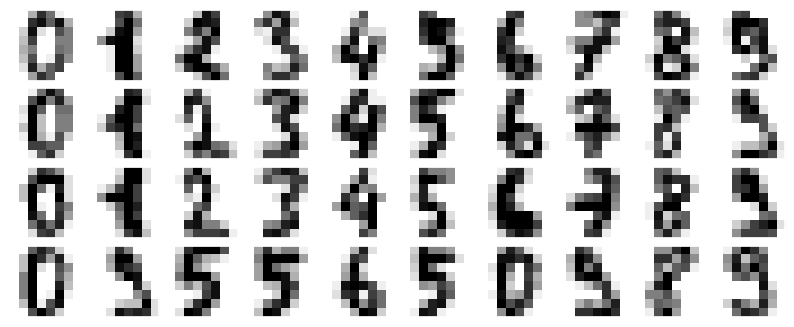

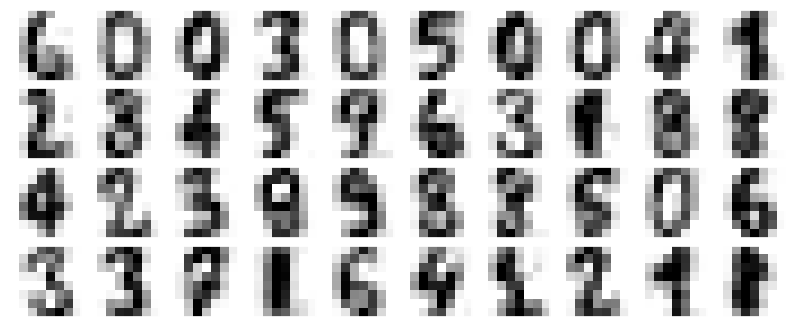

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Display plots inline
# %matplotlib inline

# Seaborn plotting defaults
import seaborn as sns
sns.set()

# digits dataset
digits = datasets.load_digits()

# Function to plot digits
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

# Display the original digits
plot_digits(digits.data)

# Apply Principal Component Analysis (PCA) to reduce dimensionality
pca = PCA(0.8)
data_pca = pca.fit_transform(digits.data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_pca, digits.target, test_size=0.2, random_state=42)

# Train SVM models with different kernels
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    if kernel == 'poly':
        param_dist = {'svc__C': stats.uniform(0.1, 10), 'svc__degree': [2, 3, 4]}
    else:
        param_dist = {'svc__C': stats.uniform(0.1, 10)}

    # Use a pipeline to include the SVC model and its parameters
    svm_model = make_pipeline(SVC(kernel=kernel))

    # Tune kernel parameters using RandomizedSearchCV
    random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=10, random_state=42, cv=5, n_jobs=-1)
    random_search.fit(X_train, y_train)

    # Evaluate and compare the performance of the models using 5-fold Cross-Validation
    cross_val_scores = cross_val_score(random_search.best_estimator_, data_pca, digits.target, cv=5)

    # Display the results in a human-readable format
    print(f"\nResults for {kernel} kernel:")
    print(f"Best parameters found: {random_search.best_params_}")
    print(f"Training Accuracy (RandomizedSearchCV): {random_search.best_score_:.4f}")
    print(f"Test Accuracy: {random_search.best_estimator_.score(X_test, y_test):.4f}")
    print(f"Cross-Validation Accuracy: {np.mean(cross_val_scores):.4f}")

# Reduced dimensions
plot_digits(pca.inverse_transform(X_train))
plt.show()